In [1]:
!pip install catboost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, recall_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import joblib
import os

# ÖN İŞLEMESİ YAPILMIŞ VERİYİ YÜKLEDİM


In [5]:
PROCESSED_DATA_PATH = r"..\data\processed\Telco_processed.csv"
df = pd.read_csv(PROCESSED_DATA_PATH)

---
ÖN İŞLEME YAPILMIŞ VERİNİN BOYUTU- VERİYİ TANIMA

In [6]:
print(f"Verinin Boyutu: ", {df.shape})
print(df.info())

Verinin Boyutu:  {(7032, 20)}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMetho

---

TARGET SUTUN OLAN DF["CHURN"] UN AYRILMASI

In [7]:
X = df.drop(columns=['Churn'])
y = df['Churn'].values

---

TRAİN-TEST AYRIMI
 stratify=y : CHURN ORANI AZ OLDUĞU İÇİN YANİ VERİ DENGESİZ OLDUĞU İÇİN HEM EĞİTİM HEM TEST SETİNDE ORAN EŞİT DAĞILMASI SAĞLIYOR

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

---

MODELLERİN TANIMLANMASI
    SVM VE KNN İÇİN SCALER GEREKİYOR ÇÜNKÜ MESAFE TABANLILAR
    Random Forest, XGBoost, CatBoost AĞAÇ TABANLI OLDUKLARI İÇİN SCALE GEREKMİYOR
        

In [ ]:
from sklearn.pipeline import Pipeline
# modelleri tanımlama
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(random_state=42))
    ]),
    'KNN': Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ]),
    'XGBoost': XGBClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=False)
}

---

MODEL EĞİTİMİ VE DEĞERLENDİRME
    results sözlüğüne her modelin sonuçlarını kaydediyoruz
    *accuracy yetmez* çünkü bu bir churn verisi. müşterilerin çoğu terk etmediği için terk edenleri bulmak amacımız. bu yüzden recall(1) metriği önemli. precision ve recall un dengesi olduğu için f1 score(1) de önemli
    


Random Forest Sonuçları:
Doğruluk: 0.7863
F1 skor(1): 0.5476
Recall(1): 0.4866

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.63      0.49      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110



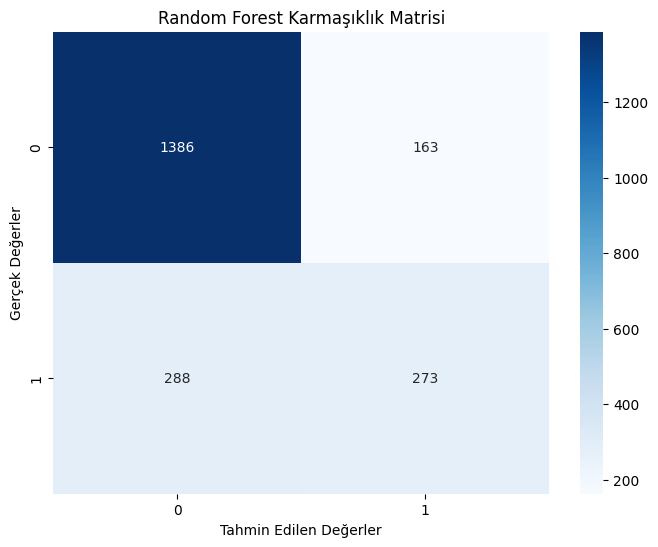


SVM Sonuçları:
Doğruluk: 0.7934
F1 skor(1): 0.5514
Recall(1): 0.4777

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.65      0.48      0.55       561

    accuracy                           0.79      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



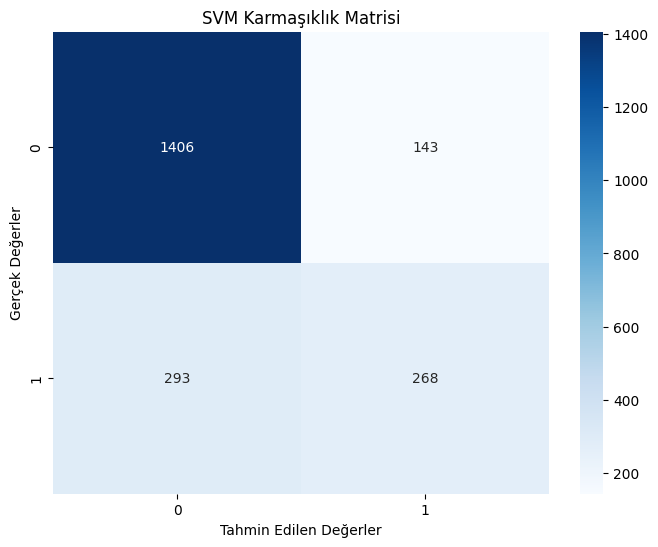


KNN Sonuçları:
Doğruluk: 0.7460
F1 skor(1): 0.5189
Recall(1): 0.5152

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1549
           1       0.52      0.52      0.52       561

    accuracy                           0.75      2110
   macro avg       0.67      0.67      0.67      2110
weighted avg       0.74      0.75      0.75      2110



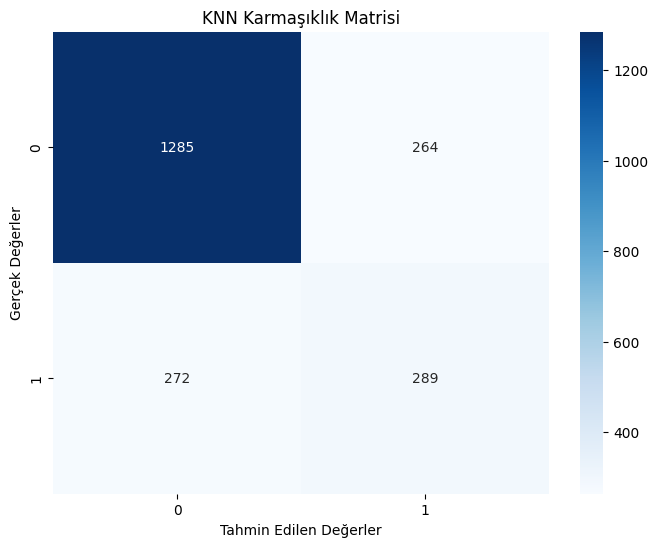


XGBoost Sonuçları:
Doğruluk: 0.7815
F1 skor(1): 0.5589
Recall(1): 0.5205

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1549
           1       0.60      0.52      0.56       561

    accuracy                           0.78      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.77      0.78      0.78      2110



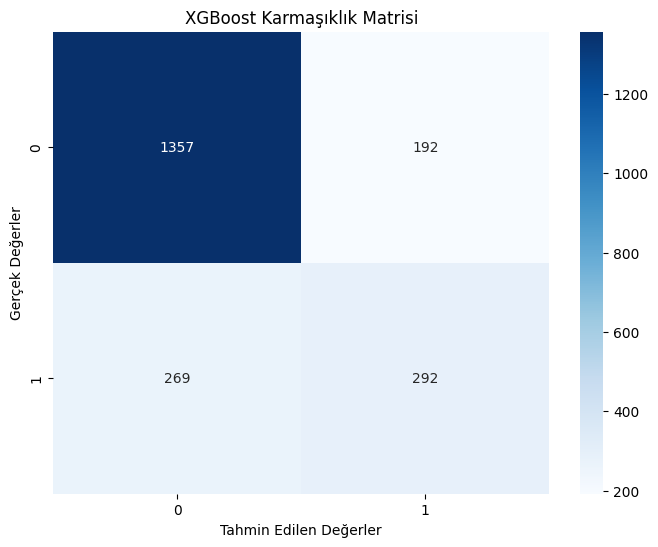


CatBoost Sonuçları:
Doğruluk: 0.7929
F1 skor(1): 0.5669
Recall(1): 0.5098

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.64      0.51      0.57       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.78      0.79      0.78      2110



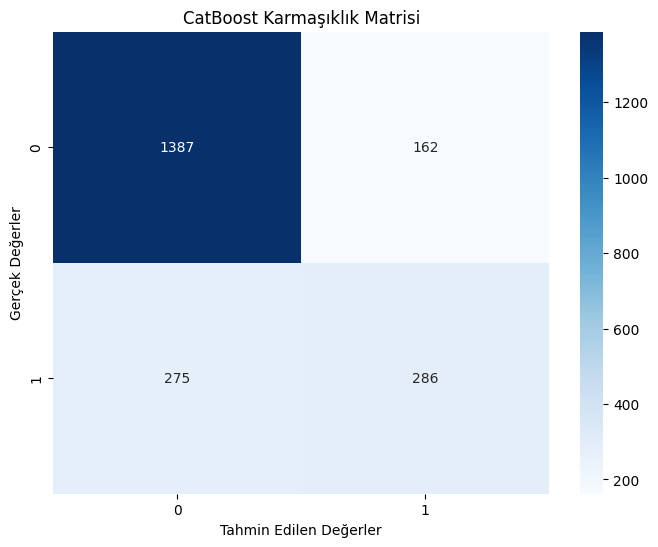

In [ ]:
# Modelleri eğitme ve değerlendirme
results = {}
for name, model in models.items():
    #eğitim
    model.fit(X_train, y_train)

    # tahminler
    y_pred = model.predict(X_test)

    #sonuçları kaydetme
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'f1' : f1_score(y_test, y_pred, pos_label=1),
        'recall' : recall_score(y_test, y_pred, pos_label=1),
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    print(f"\n{name} Sonuçları:")
    print(f"Doğruluk: {results[name]['accuracy']:.4f}")
    print(f"F1 skor(1): {results[name]['f1']:.4f}")
    print(f"Recall(1): {results[name]['recall']:.4f}")


    print("\nSınıflandırma Raporu:")
    print(results[name]['classification_report'])

    # conf matrisini görselleştirme
    plt.figure(figsize=(8, 6))
    sns.heatmap(results[name]['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Karmaşıklık Matrisi')
    plt.ylabel('Gerçek Değerler')
    plt.xlabel('Tahmin Edilen Değerler')
    plt.show()

---

f1 skora göre en iyi modeli bulma

In [ ]:
# en iyi modeli bulma
best_model_name = max(results.items(), key=lambda x: x[1]['f1'])[0]
best_model = models[best_model_name]
print(f"\nf1 skora göre en iyi model: {best_model_name}")


f1 skora göre en iyi model: CatBoost


In [ ]:
# en iyi modelin test seti sonuçlarını yazdırma
print(f"\nF1 skora göre en iyi modelin test seti sonuçları ({best_model_name}):")
print(f"Doğruluk: {results[best_model_name]['accuracy']:.4f}")
print(f"F1 skor: {results[best_model_name]['f1']:.4f}")

print("\nSınıflandırma Raporu:")
print(results[best_model_name]['classification_report'])



F1 skora göre en iyi modelin test seti sonuçları (CatBoost):
Doğruluk: 0.7929
F1 skor: 0.5669

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.64      0.51      0.57       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.78      0.79      0.78      2110



---

# tüm modellerin doğruluk (accuracy) skorlarını 
    svm accuracy de en iyi olmasına rağmen recall(1) ve f1 score(1) da catboost un ve çoğu modelin gerisinde
    accuracynin her zaman en önemli metrik olmadığı sonucu çıkarıyorum

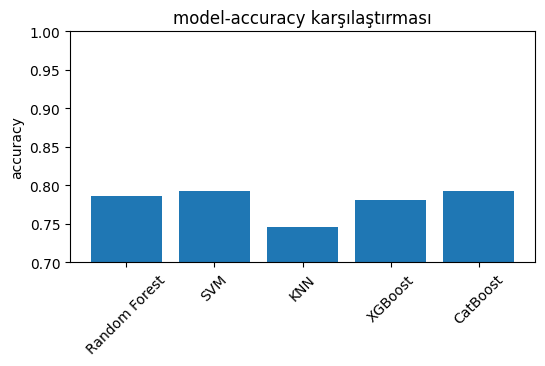

In [30]:
accuracies = {name: result['accuracy'] for name, result in results.items()}
plt.figure(figsize=(6, 3))
plt.bar(accuracies.keys(), accuracies.values())
plt.title('model-accuracy karşılaştırması')
plt.xticks(rotation=45)
plt.ylabel('accuracy')
plt.ylim(0.70, 1.0)
plt.show()

---

bu kısım grafiğim için 
    X setindeki tüm veri için churn:1 olasılığının  predict_proba ile hesaplanması
        df['churn_probability'] = all_probs 
    df['churn_probability'] içeren verinin grafikte kullanılmak için dizine kaydedilmesi

In [ ]:
# CHURN 1 OLMA İHTİMALİ: ([:, 1])
all_probs = best_model.predict_proba(X)[:, 1]
df['churn_probability'] = all_probs

output_path = "../data/processed/telco_churn_with_probs.csv"
os.makedirs("../data/processed", exist_ok=True)
df.to_csv(output_path, index=False)
# kontrol
print(df[['Churn', 'churn_probability']].head())

   Churn  churn_probability
0      0           0.498949
1      0           0.023822
2      1           0.587858
3      0           0.012615
4      1           0.605964
